# XBEACH declarative example

In this notebook we will define a XBEACH workspace entirely from yaml file

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import yaml
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

## Instantiate model

Use a fully-defined config from yaml to instantiate ModelRun with the runtime parameters
and the config definition

In [3]:
# Uncoment below to view the contents of the yaml file

# !cat example_declarative.yml

In [4]:
from rompy.model import ModelRun

conf = yaml.load(open("example_declarative.yml"), Loader=yaml.Loader)
run = ModelRun(**conf)
run

ModelRun(run_id='run1', period=TimeRange(start=datetime.datetime(2024, 10, 15, 0, 0), end=datetime.datetime(2024, 10, 15, 0, 30), duration=datetime.timedelta(seconds=1800), interval=datetime.timedelta(seconds=1), include_end=True), output_dir=PosixPath('example_declarative'), config=Config(model_type='xbeach', template='/source/csiro/rompy-xbeach/src/rompy_xbeach/templates/base', checkout='main', grid=RegularGrid(ori=Ori(x=115.594239, y=-32.641104, crs='EPSG:4326'), alfa=347.0, dx=10.0, dy=15.0, nx=230, ny=220, crs='EPSG:28350'), bathy=XBeachBathy(model_type='xbeach_bathy', id='data', source=SourceGeotiff(model_type='geotiff', filename='/source/csiro/rompy-xbeach/tests/data/bathy.tif', band=1, kwargs={}), link=False, filter=Filter(sort={}, subset={}, crop={}, timenorm={}, rename={}, derived={}), variables=[], coords=DatasetCoords(t='time', x='longitude', y='latitude', z='depth'), crop_data=True, buffer=0.0, time_buffer=[0, 0], interpolator=RegularGridInterpolator(model_type='scipy_regu

## QC config

Plot model grid and data to QC before generating the workspace

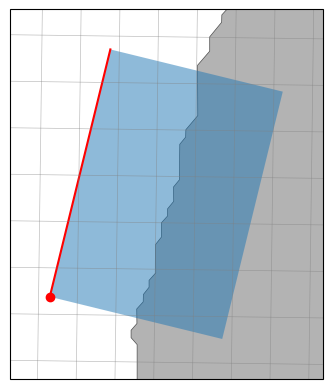

In [5]:
# Model grid

ax = run.config.grid.plot(scale="f")

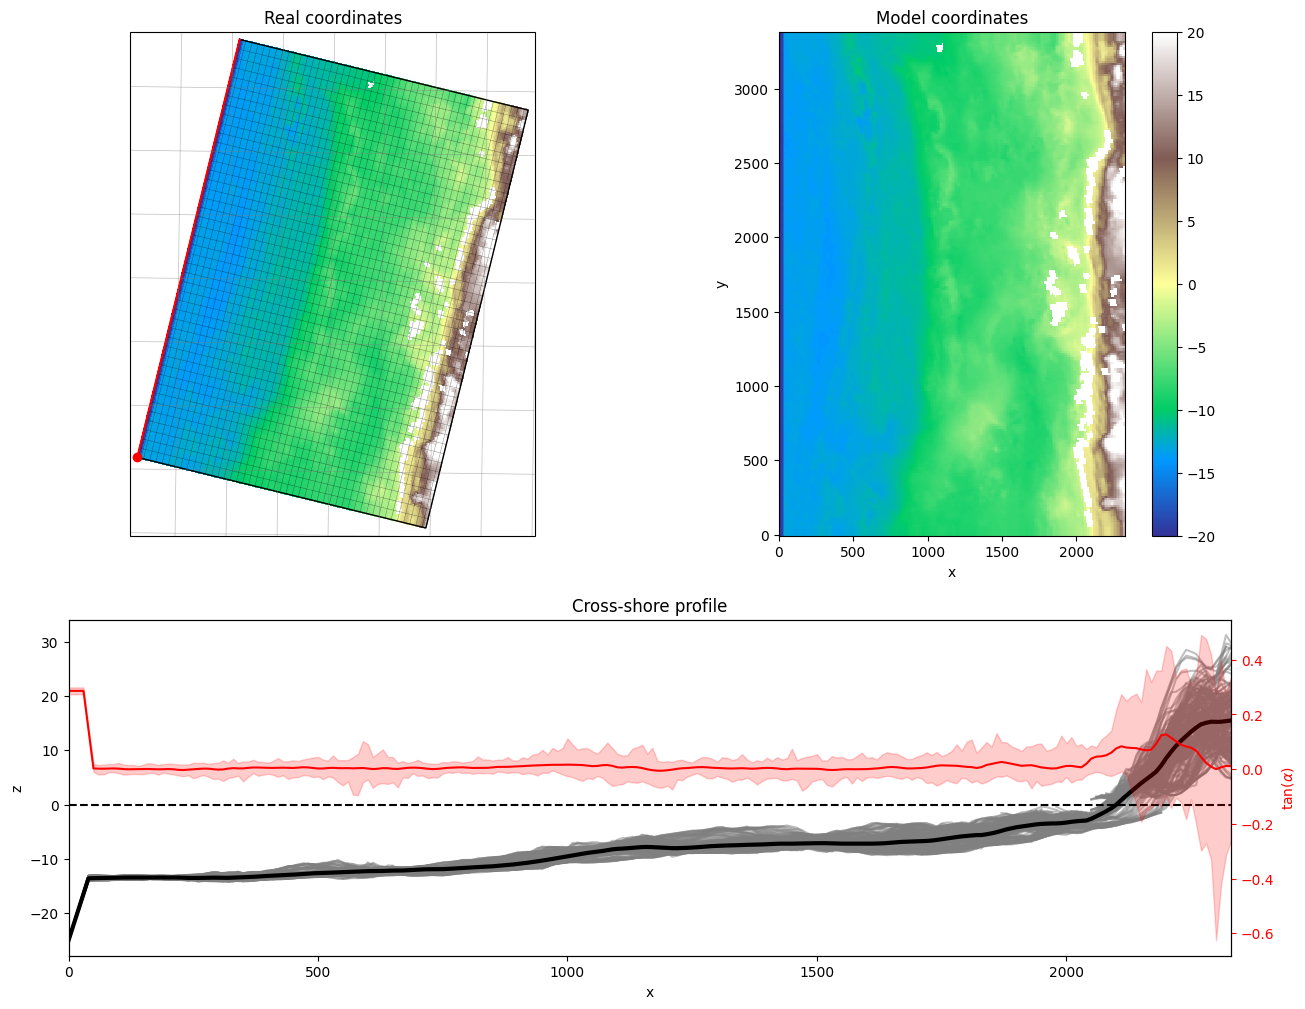

In [6]:
# Model bathy

tmpdir = Path("tmp")
tmpdir.mkdir(exist_ok=True)

# Generate the bathymetry data
xfile, yfile, depfile, grid_extended = run.config.bathy.get(destdir=tmpdir, grid=run.config.grid)

# Load the bathymetry data
dset = xr.Dataset.xbeach.from_xbeach(depfile, grid_extended)

# Plot the bathymetry data
dset.xbeach.plot_model_bathy(grid_extended, posdwn=False)

## Generate the workspace

In [7]:
run()

INFO:rompy.model:
INFO:rompy.model:-----------------------------------------------------
INFO:rompy.model:Model settings:
INFO:rompy.model:
run_id: run1
period: 
	Start: 2024-10-15 00:00:00
	End: 2024-10-15 00:30:00
	Duration: 0:30:00
	Interval: 0:00:01
	Include End: True

output_dir: example_declarative
config: <class 'rompy_xbeach.config.Config'>

INFO:rompy.model:-----------------------------------------------------
INFO:rompy.model:Generating model input files in example_declarative
INFO:rompy.model:
INFO:rompy.model:Successfully generated project in example_declarative
INFO:rompy.model:-----------------------------------------------------


'/source/csiro/rompy-notebooks/notebooks/xbeach/example_declarative/run1'

## Check the workspace

In [8]:
modeldir = Path(run.output_dir) / run.run_id

sorted(modeldir.glob("*"))

[PosixPath('example_declarative/run1/bathy.txt'),
 PosixPath('example_declarative/run1/input'),
 PosixPath('example_declarative/run1/output'),
 PosixPath('example_declarative/run1/params.txt'),
 PosixPath('example_declarative/run1/xdata.txt'),
 PosixPath('example_declarative/run1/ydata.txt')]

In [9]:
params = modeldir / "params.txt"
print(params.read_text())

#
# XBEACH - Simple example template used by rompy
# Template: /source/csiro/rompy-xbeach/src/rompy_xbeach/templates/base
# Generated: 2024-10-15 03:01:08.567055 on rafael-XPS by rguedes
#

###########################################################################
#                               MODEL GRID                                #
###########################################################################

nx           = 234
ny           = 226
dx           = 10.0
dy           = 15.0
xori         = 368095.9047500096
yori         = 6387591.740656142
alfa         = 347.0
projection   = +proj=utm +zone=50 +south +ellps=GRS80 +units=m +no_defs +type=crs
rugdepth     = 0.011
tunits       = seconds since 1970-01-01 00:00:00.00 +00"
thetamin     = -80.0
thetamax     = 80.0
dtheta       = 10.0

###########################################################################
#                               MODEL TIME                                #
##########################################

## Run the model

To be implemented

## Plot outputs

To be implemented

## Cleanup

Uncomment below to clean up the test workspace directory

In [11]:
# import shutil

# shutil.rmtree(run.output_dir, ignore_errors=True)